Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

Load the Dataset

In [14]:
accounts = pd.read_csv('/content/ravenstack_accounts.csv')
subscriptions = pd.read_csv('/content/ravenstack_subscriptions.csv')
feature_usage = pd.read_csv('/content/ravenstack_feature_usage.csv')
churn_events = pd.read_csv('/content/ravenstack_churn_events.csv')
support_tickets = pd.read_csv('/content/ravenstack_support_tickets.csv')

accounts.head()


,account_id,account_name,industry,country,signup_date,referral_source,plan_tier,seats,is_trial,churn_flag
0,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,False,False
1,A-43a9e3,Company_1,FinTech,IN,2023-08-17,other,Basic,18,False,True
2,A-0a282f,Company_2,DevTools,US,2024-08-27,organic,Basic,1,False,False
3,A-1f0ac7,Company_3,HealthTech,UK,2023-08-27,other,Basic,24,True,False
4,A-ce550d,Company_4,HealthTech,US,2024-10-27,event,Enterprise,35,False,True


Info of the dataset

In [15]:
accounts.info()
subscriptions.info()
feature_usage.info()
churn_events.info()
support_tickets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   account_id       500 non-null    object
 1   account_name     500 non-null    object
 2   industry         500 non-null    object
 3   country          500 non-null    object
 4   signup_date      500 non-null    object
 5   referral_source  500 non-null    object
 6   plan_tier        500 non-null    object
 7   seats            500 non-null    int64 
 8   is_trial         500 non-null    bool  
 9   churn_flag       500 non-null    bool  
dtypes: bool(2), int64(1), object(7)
memory usage: 32.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_id    5000 non-null   object
 1   account_id         5000 non-null   object


Converting date time to right format

In [16]:
subscriptions['start_date'] = pd.to_datetime(subscriptions['start_date'])
subscriptions['end_date'] = pd.to_datetime(subscriptions['end_date'])

feature_usage['usage_date'] = pd.to_datetime(feature_usage['usage_date'])

churn_events['churn_date'] = pd.to_datetime(churn_events['churn_date'])

support_tickets['submitted_at'] = pd.to_datetime(support_tickets['submitted_at'])
support_tickets['closed_at'] = pd.to_datetime(support_tickets['closed_at'])


In [17]:
print("Total Accounts:", accounts['account_id'].nunique())
print("Total Subscriptions:", subscriptions['subscription_id'].nunique())
print("Total Feature Usage Records:", len(feature_usage))
print("Total Churn Events:", len(churn_events))
print("Total Support Tickets:", len(support_tickets))


Total Accounts: 500
Total Subscriptions: 5000
Total Feature Usage Records: 25000
Total Churn Events: 600
Total Support Tickets: 2000


Merge Table

In [18]:
account_data = accounts.merge(subscriptions, on='account_id', how='left')
account_data.head()


,account_id,account_name,industry,country,signup_date,referral_source,plan_tier_x,seats_x,is_trial_x,churn_flag_x,subscription_id,start_date,end_date,plan_tier_y,seats_y,mrr_amount,arr_amount,is_trial_y,upgrade_flag,downgrade_flag,churn_flag_y,billing_frequency,auto_renew_flag
0,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,False,False,S-faa8ec,2024-12-09,NaT,Basic,11,209,2508,False,False,False,False,monthly,True
1,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,False,False,S-b78829,2024-11-12,NaT,Pro,20,980,11760,False,False,False,False,monthly,True
2,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,False,False,S-7ce677,2024-10-20,NaT,Pro,9,441,5292,False,False,False,False,monthly,True
3,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,False,False,S-34a131,2024-11-29,NaT,Enterprise,9,1791,21492,False,False,False,False,annual,False
4,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,False,False,S-1e349b,2024-11-13,NaT,Basic,102,1938,23256,False,False,False,False,monthly,True


Monthly Active Users

In [20]:
feature_usage['usage_month'] = feature_usage['usage_date'].dt.to_period('M')

# Merge feature_usage with subscriptions to get account_id
feature_usage_with_accounts = pd.merge(feature_usage, subscriptions[['subscription_id', 'account_id']], on='subscription_id', how='left')

mau = (
    feature_usage_with_accounts.groupby('usage_month')['account_id']
    .nunique()
    .reset_index()
)

mau

,usage_month,account_id
0,2023-01,440
1,2023-02,412
2,2023-03,431
3,2023-04,432
4,2023-05,438
5,2023-06,420
6,2023-07,415
7,2023-08,426
8,2023-09,409
9,2023-10,426


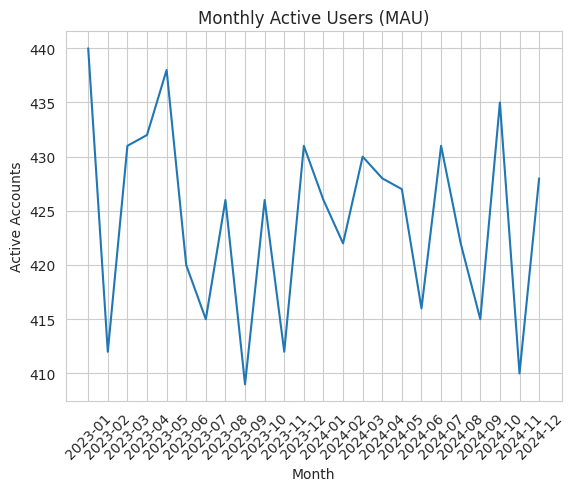

In [23]:
plt.figure()
plt.plot(mau['usage_month'].astype(str), mau['account_id'])
plt.xticks(rotation=45)
plt.title("Monthly Active Users (MAU)")
plt.xlabel("Month")
plt.ylabel("Active Accounts")
plt.show()


Feature Adoption Analysis

In [25]:
feature_adoption = (
    feature_usage_with_accounts.groupby('feature_name')['account_id']
    .nunique()
    .reset_index()
    .sort_values(by='account_id', ascending=False)
)

feature_adoption

,feature_name,account_id
3,feature_12,374
8,feature_17,366
11,feature_2,360
29,feature_36,359
32,feature_39,356
25,feature_32,354
31,feature_38,353
5,feature_14,352
18,feature_26,352
37,feature_7,351


Adoption rate


In [26]:
total_accounts = accounts['account_id'].nunique()

feature_adoption['adoption_rate'] = (
    feature_adoption['account_id'] / total_accounts
)

feature_adoption


,feature_name,account_id,adoption_rate
3,feature_12,374,0.748
8,feature_17,366,0.732
11,feature_2,360,0.720
29,feature_36,359,0.718
32,feature_39,356,0.712
25,feature_32,354,0.708
31,feature_38,353,0.706
5,feature_14,352,0.704
18,feature_26,352,0.704
37,feature_7,351,0.702


Churn Rate Calculation

In [27]:
churned_accounts = churn_events['account_id'].nunique()
total_accounts = accounts['account_id'].nunique()

churn_rate = churned_accounts / total_accounts

print("Overall Churn Rate:", round(churn_rate * 100, 2), "%")


Overall Churn Rate: 70.4 %


Engagement vs Churn Analysis

In [28]:
accounts['churn_flag'] = accounts['account_id'].isin(
    churn_events['account_id']
)


In [30]:
usage_count = (
    feature_usage_with_accounts.groupby('account_id')
    .size()
    .reset_index(name='total_usage')
)

analysis_table = accounts.merge(usage_count, on='account_id', how='left')
analysis_table['total_usage'] = analysis_table['total_usage'].fillna(0)

analysis_table.groupby('churn_flag')['total_usage'].mean()

,total_usage
churn_flag,
False,49.391892
True,50.255682


Support Tickets vs Churn

In [31]:
ticket_counts = (
    support_tickets.groupby('account_id')
    .size()
    .reset_index(name='ticket_count')
)

analysis_table = analysis_table.merge(ticket_counts, on='account_id', how='left')
analysis_table['ticket_count'] = analysis_table['ticket_count'].fillna(0)

analysis_table.groupby('churn_flag')['ticket_count'].mean()


,ticket_count
churn_flag,
False,4.087838
True,3.963068


Engagement Segmentation

In [32]:
conditions = [
    analysis_table['total_usage'] > 100,
    analysis_table['total_usage'] > 30
]

choices = ['Power User', 'Moderate User']

analysis_table['segment'] = np.select(
    conditions,
    choices,
    default='Low Engagement'
)

analysis_table['segment'].value_counts()


,count
segment,
Moderate User,428
Low Engagement,70
Power User,2


Cohort Analysis Setup

In [33]:
# First subscription date per account
first_subscription = (
    subscriptions.groupby('account_id')['start_date']
    .min()
    .reset_index()
)

first_subscription['cohort_month'] = first_subscription['start_date'].dt.to_period('M')

first_subscription.head()


,account_id,start_date,cohort_month
0,A-00bed1,2023-11-16,2023-11
1,A-00cac8,2023-09-16,2023-09
2,A-0158bb,2024-05-30,2024-05
3,A-016043,2024-08-02,2024-08
4,A-019782,2023-06-08,2023-06


In [42]:
# Calculate the actual cohort month (first usage month) for each account
# from the feature_usage_with_accounts DataFrame
account_first_usage_month = (
    feature_usage_with_accounts.groupby('account_id')['usage_date']
    .min()
    .dt.to_period('M')
    .reset_index(name='cohort_month')
)

# Merge this true cohort month into feature_usage_with_accounts
cohort_usage = feature_usage_with_accounts.merge(
    account_first_usage_month,
    on='account_id',
    how='left'
)

cohort_usage['usage_month'] = cohort_usage['usage_date'].dt.to_period('M')

cohort_usage.head()

,usage_id,subscription_id,usage_date,feature_name,usage_count,usage_duration_secs,error_count,is_beta_feature,usage_month,account_id,cohort_month
0,U-1c6c24,S-0fcf7d,2023-07-27,feature_20,9,5004,0,False,2023-07,A-e08cd3,2023-01
1,U-f07cb8,S-c25263,2023-08-07,feature_5,9,369,0,False,2023-08,A-c7ffc2,2023-01
2,U-096807,S-f29e7f,2023-12-07,feature_3,9,1458,0,False,2023-12,A-bbe56f,2023-01
3,U-6b1580,S-be655e,2024-07-28,feature_40,5,2085,0,False,2024-07,A-7f29a7,2023-01
4,U-720a29,S-f9b1d0,2024-12-02,feature_12,12,900,0,False,2024-12,A-65a46c,2023-01


In [43]:
retention = (
    cohort_usage.groupby(['cohort_month', 'usage_month'])['account_id']
    .nunique()
    .reset_index()
)


In [44]:
retention['period_number'] = (
    retention['usage_month'] - retention['cohort_month']
).apply(lambda x: x.n)


In [45]:
retention_pivot = retention.pivot_table(
    index='cohort_month',
    columns='period_number',
    values='account_id'
)

retention_pivot


period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
cohort_month,,,,,,,,,,,,,,,,,,,,,,,,
2023-01,440.0,364.0,383.0,382.0,387.0,374.0,367.0,377.0,364.0,377.0,364.0,383.0,378.0,374.0,388.0,384.0,377.0,372.0,385.0,375.0,374.0,382.0,365.0,379.0
2023-02,48.0,39.0,42.0,43.0,38.0,40.0,40.0,38.0,40.0,39.0,39.0,39.0,41.0,33.0,36.0,43.0,38.0,36.0,36.0,34.0,44.0,37.0,38.0,NaN
2023-03,9.0,7.0,8.0,6.0,6.0,7.0,5.0,6.0,7.0,8.0,7.0,6.0,6.0,7.0,5.0,3.0,7.0,9.0,7.0,8.0,5.0,8.0,NaN,NaN
2023-04,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN
2023-06,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2023-10,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
cohort_sizes = retention_pivot[0]

retention_rate = retention_pivot.divide(cohort_sizes, axis=0)

retention_rate

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
cohort_month,,,,,,,,,,,,,,,,,,,,,,,,
2023-01,1.0,0.827273,0.870455,0.868182,0.879545,0.850000,0.834091,0.856818,0.827273,0.856818,0.827273,0.870455,0.859091,0.850000,0.881818,0.872727,0.856818,0.845455,0.875000,0.852273,0.850000,0.868182,0.829545,0.861364
2023-02,1.0,0.812500,0.875000,0.895833,0.791667,0.833333,0.833333,0.791667,0.833333,0.812500,0.812500,0.812500,0.854167,0.687500,0.750000,0.895833,0.791667,0.750000,0.750000,0.708333,0.916667,0.770833,0.791667,NaN
2023-03,1.0,0.777778,0.888889,0.666667,0.666667,0.777778,0.555556,0.666667,0.777778,0.888889,0.777778,0.666667,0.666667,0.777778,0.555556,0.333333,0.777778,1.000000,0.777778,0.888889,0.555556,0.888889,NaN,NaN
2023-04,1.0,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN
2023-06,1.0,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
2023-10,1.0,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


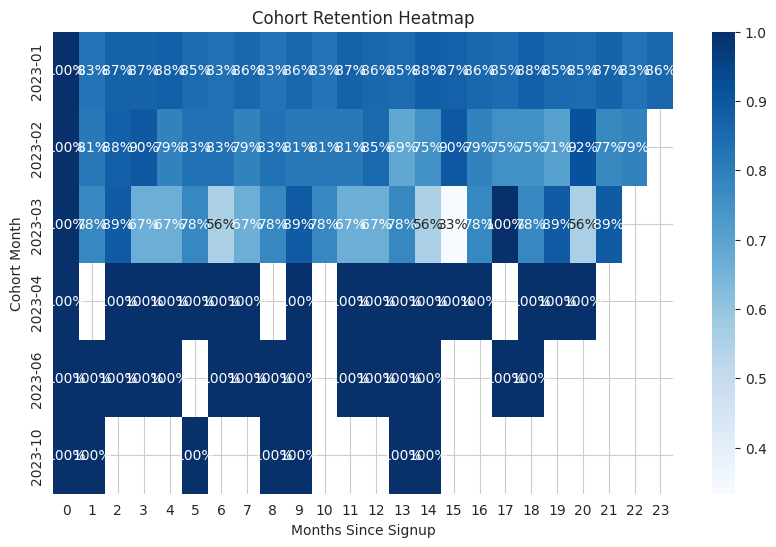

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(retention_rate, annot=True, fmt=".0%", cmap="Blues")
plt.title("Cohort Retention Heatmap")
plt.ylabel("Cohort Month")
plt.xlabel("Months Since Signup")
plt.show()


In [48]:
churn_analysis = first_subscription.merge(
    churn_events[['account_id', 'churn_date']],
    on='account_id',
    how='inner'
)

churn_analysis['lifetime_days'] = (
    churn_analysis['churn_date'] - churn_analysis['start_date']
).dt.days

churn_analysis['lifetime_days'].describe()


,lifetime_days
count,600.000000
mean,139.513333
std,148.746122
min,-157.000000
25%,24.000000
50%,89.000000
75%,223.000000
max,612.000000


In [50]:
usage_before_churn = feature_usage_with_accounts.merge(
    churn_events[['account_id', 'churn_date']],
    on='account_id',
    how='inner'
)

usage_before_churn['days_before_churn'] = (
    usage_before_churn['churn_date'] - usage_before_churn['usage_date']
).dt.days

recent_usage = usage_before_churn[
    (usage_before_churn['days_before_churn'] >= 0) &
    (usage_before_churn['days_before_churn'] <= 30)
]

recent_usage.groupby('account_id').size().describe()

,0
count,320.000000
mean,4.050000
std,2.905621
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,17.000000


In [51]:
retention_rate.to_csv("retention_rate.csv")
analysis_table.to_csv("account_analysis_table.csv", index=False)
feature_adoption.to_csv("feature_adoption.csv", index=False)
